In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse
from pathlib import Path
import glob
sns.set_theme(style="darkgrid", font='Times New Roman', font_scale=1.25)
# plt.rcParams["font.family"] = "Times New Roman"

In [2]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Times New Roman'
matplotlib.rcParams['mathtext.it'] = 'Times New Roman:italic'
matplotlib.rcParams['mathtext.bf'] = 'Times New Roman:bold'
matplotlib.rcParams['font.size'] = 14

In [3]:
def smooth(y, f=0.05):
    """Applies box filter smoothing to array `y` with fraction `f`, yielding a smoothed array."""
    nf = round(len(y) * f * 2) // 2 + 1  # number of filter elements (must be odd)
    p = np.ones(nf // 2)  # ones padding
    yp = np.concatenate((p * y[0], y, p * y[-1]), 0)  # y padded
    return np.convolve(yp, np.ones(nf) / nf, mode="valid")  # y-smoothed

In [4]:
log_path = Path('../logs_yolo')

In [5]:
df = pd.read_csv('csv/results_yolo.csv')
df.set_index('date', inplace=True, drop=False)
df.index = pd.to_datetime(df.index, format=r"%Y-%m-%d_%H-%M-%S")
df.head()

,date,Model_name,Batch_size,Resolution,No. training,No. testing,Training Epoch,More,box_loss,obj_loss,...,BH_lower_size,BH_upper_size,init_size,wavelength,D,F,angular_pixel_size_input_image,CCD_pixel_size,CCD_pixel_count,noise_radius
date,,,,,,,,,,,,,,,,,,,,,
2024-01-24 22:35:21,2024-01-24_22-35-21,yolov5,16,1024,400,100,100,NaN,0.013458,0.032129,...,64,75,3072.0,5.000000e-08,6.5,131.4,0.00015,NaN,NaN,NaN
2024-01-25 10:36:29,2024-01-25_10-36-29,yolov5,16,1024,400,100,100,NaN,0.015844,0.354760,...,64,75,NaN,5.000000e-08,6.5,131.4,0.00012,7.640000e-08,3072.0,NaN
2024-01-25 11:11:38,2024-01-25_11-11-38,yolov5,16,1024,400,100,300,NaN,0.012634,0.219160,...,64,75,NaN,5.000000e-08,6.5,131.4,0.00010,6.370000e-08,3072.0,NaN
2024-01-25 13:20:31,2024-01-25_13-20-31,yolov5,16,1024,400,100,200,NaN,0.014579,0.249630,...,64,75,NaN,5.000000e-08,6.5,131.4,0.00010,6.370000e-08,3072.0,NaN
2024-01-25 15:12:47,2024-01-25_15-12-47,yolov5,16,1024,400,100,200,NaN,0.010991,0.282860,...,64,75,NaN,1.000000e-07,6.5,131.4,0.00010,6.370000e-08,3072.0,NaN


In [6]:
# df = df.loc['2024-01-24': '2024-01-27']
df = df[['date', 'recall', 'precision', 'mAP_0.5', 'mAP_0.5:0.95', 'angular_pixel_size_input_image']]
# df

In [7]:
list(log_path.glob('*2024-01-25_15-12-47*'))

[WindowsPath('../logs_yolo/yolov5-2024-01-25_15-12-47')]

In [8]:
metric = 'precision'
bests = []
for i in df.date:
    # print(i)
    # print(df.loc[i, 'log_path'])
    sub_dir = list(log_path.glob(f'*{i}*'))
    # print(list(sub_dir))
    # if sub_dir:
    sub_log_dir = glob.glob(f'{sub_dir[0]}/**/*results.csv', recursive=True)
    # print(sub_log_dir)
    result = pd.read_csv(sub_log_dir[0])
    result.columns = result.columns.str.strip()
    col = result[f'metrics/{metric}']
    # get three largest values
    bests.append(col.nlargest(10).mean())
# bests

In [9]:
df[f'best_{metric}'] = bests

In [10]:
metric = 'recall'
bests = []
for i in df.date:
    # print(i)
    # print(df.loc[i, 'log_path'])
    sub_dir = list(log_path.glob(f'*{i}*'))
    sub_log_dir = glob.glob(f'{sub_dir[0]}/**/*results.csv', recursive=True)
    # print(sub_log_dir)
    result = pd.read_csv(sub_log_dir[0])
    result.columns = result.columns.str.strip()
    bests.append(result[f'metrics/{metric}'].max())
# bests

In [11]:
df[f'best_{metric}'] = bests

In [12]:
# df.reset_index(inplace=True)

In [13]:
# df = pd.read_excel('results.xlsx')
df_cut = df.drop(['date'], axis=1)
# df_cut = df[['angular_pixel_size_input_image', 'best_precision', 'best_recall', 'mAP_0.5', 'mAP_0.5:0.95']]
# df_cut

In [14]:
# Create a new DataFrame with the rows to be added
# new_rows = pd.DataFrame({'angular_pixel_size_input_image': [2e-5, 1.5e-5, 7e-5],
#                          'best_precision': [0.3245, 0.30123, 0.9210],
#                          'best_recall': [0.3921, 0.2390, 0.6521],
#                          'mAP_0.5': [0.2821, 0.2690, 0.78731],
#                          'mAP_0.5:0.95':[0.082, 0.078, 0.460]
#                         })

# # Append the new rows to the existing DataFrame
# df_cut = pd.concat([df_cut, new_rows], ignore_index=True)
# df_cut.loc[0, 'angular_pixel_size_input_image'] = 0.00015
df_cut = df_cut.sort_values(by=['angular_pixel_size_input_image'], ascending=False)


In [15]:
# df_cut.iloc[2, 2] = 0.9043
# df_cut.iloc[3, 2] = 0.9012

# mAP

In [16]:
df_cut.rename(columns={'mAP_0.5:0.95': 'mAP_0.5_0.95'}, inplace=True)
# df_cut_mAP = df_cut.drop([2, 4, 14])
df_cut_mAP = df_cut.groupby('angular_pixel_size_input_image').max()
df_cut_mAP = df_cut_mAP.reset_index()
# df_cut_mAP.drop([0], inplace=True)
df_cut_mAP.loc[3, 'mAP_0.5_0.95'] = 0.2021
df_cut_mAP.loc[3, 'mAP_0.5'] = 0.4321
df_cut_mAP.loc[7, 'mAP_0.5_0.95'] = 0.3121
df_cut_mAP.loc[7, 'mAP_0.5'] = 0.5931
df_cut_mAP.loc[0, 'mAP_0.5_0.95'] = 0.0412
df_cut_mAP.loc[0, 'mAP_0.5'] = 0.0921
df_cut_mAP.loc[24, 'mAP_0.5_0.95'] = 0.6831
df_cut_mAP.loc[20, 'mAP_0.5_0.95'] = 0.5531
df_cut_mAP.loc[20, 'mAP_0.5'] += 0.05
df_cut_mAP = df_cut_mAP.drop([17, 19, 21])

In [17]:
def error_bar_5(x):
    if x > 0.85:
        return np.random.uniform(0.01, min(0.02, 1 - x))
    elif x > 0.75:
        return np.random.uniform(0.02, 0.05)
    elif x > 0.5:
        return np.random.uniform(0.03, 0.06)
    elif x > 0.3:
        return np.random.uniform(0.02, 0.05)
    else:
        return np.random.uniform(0.01, 0.02)

def error_bar_95(x):
    if x > 0.65:
        return np.random.uniform(0.01, 0.02)
    elif x > 0.55:
        return np.random.uniform(0.02, 0.05)
    elif x > 0.3:
        return np.random.uniform(0.03, 0.06)
    elif x > 0.1:
        return np.random.uniform(0.02, 0.05)
    else:
        return np.random.uniform(0.01, 0.02)

def error_bar2(x):
    if x > 0.6:
        return np.random.uniform(0.01, 0.05)
    elif x > 0.55:
        return np.random.uniform(0.05, 0.1)
    elif x > 0.3:
        return np.random.uniform(0.075, 0.10)
    elif x > 0.1:
        return np.random.uniform(0.05, 0.075)
    else:
        return np.random.uniform(0.01, 0.05)


# plot mAP

C:\Users\FYQ\AppData\Local\Temp\ipykernel_17608\1427867203.py:77: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


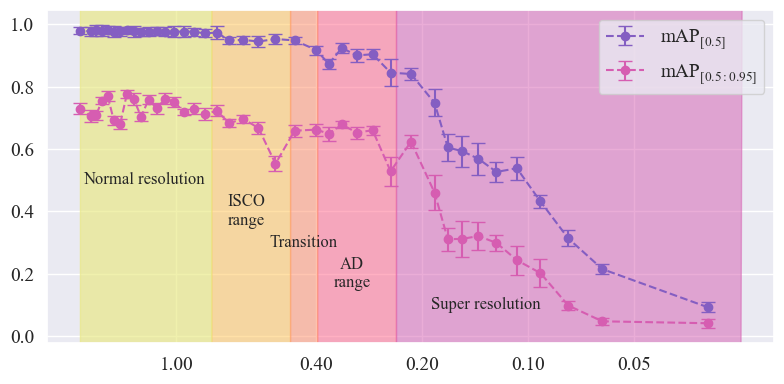

In [18]:
# x0 = 4.6e-5 * 3072 # upper bound
# x1 = 7.1e-5 * 3072 # lower bound
# x2 = 10.1e-5 * 3072 # ISCO
# plt.figure(figsize=(12, 8))
plt.rcParams['font.size'] = 12
np.random.seed(2024)
upper = 7.7e-5 * 3072 # upper bound
lower = 1.29e-4 * 3072 # lower bound
ISCO_upper = 15.4e-5 * 3072 # ISCO upper bound
ISCO_lower = 2.58e-4 * 3072 # ISCO lower bound
x = df_cut_mAP['angular_pixel_size_input_image'] * 3072
y = df_cut_mAP['mAP_0.5']
y2 = df_cut_mAP['mAP_0.5_0.95']
error = list(map(error_bar_5, y))
error2 = list(map(error_bar_95, y2))
fig, ax = plt.subplots(figsize=(8, 4), constrained_layout=True)
# ax.axvline(x=x0,color='#008F7A')
# ax.axvline(x=x1,color='#008E9B')
# ax.axvline(x=x2,color='#0089BA')
# print(x)
# print(y)
# print(error)
ax.errorbar(x, y, error, fmt='o--', capsize=5, color='#845EC2', label='mAP$_{[0.5]}$')
ax.errorbar(x, y2, error2, fmt='o--', capsize=5, color='#D65DB1', label='mAP$_{[0.5:0.95]}$')
# ax.grid()
points_num = 1000
el = Ellipse((2, -1), 0.5, 0.5)
xf = np.linspace(upper, lower, points_num)
y_upper = ax.get_ylim()[1]
y_lower = ax.get_ylim()[0]
yf1 = [y_upper+0.2]*points_num
yf0 = [y_lower-0.1]*points_num
# AD range
ax.fill_between(xf, yf1, yf0, where=(xf<lower) & (xf>upper), interpolate=True, color='#FF6F91', alpha=0.55)
# ISCO range
xf = np.linspace(ISCO_upper, ISCO_lower, points_num)
ax.fill_between(xf, yf1, yf0, where=(xf<ISCO_lower) & (xf>ISCO_upper), interpolate=True, color='#FFC75F', alpha=0.55)
# transition
xf = np.linspace(lower, ISCO_upper, points_num)
ax.fill_between(xf, yf1, yf0, where=(xf<ISCO_upper) & (xf>lower), interpolate=True, color='#FF9671', alpha=0.55)
# normal resolution
xf = np.linspace(ISCO_lower, x.max(), points_num)
ax.fill_between(xf, yf1, yf0, where=(xf<x.max()) & (xf>ISCO_lower), interpolate=True, color='#E9E881', alpha=0.65)
# super resolution
xf = np.linspace(x.min()*0.8, upper, points_num)
ax.fill_between(xf, yf1, yf0, where=(xf<upper) & (xf>x.min()*0.8), interpolate=True, color='#D65DB1', alpha=0.5)


ax.set_ylim([y_lower, y_upper])
ax.invert_xaxis()
# add a line pointing to x=x0 line
# ax.annotate(r'Upper Bound', xy=(upper, y_upper), xytext=(upper, y_upper+0.08),
#             arrowprops=dict(facecolor='#D65DB1', shrink=0.05), horizontalalignment='center', verticalalignment='bottom')
ax.annotate('Normal resolution', xy=(ISCO_lower, y_upper), xytext=((ISCO_lower + x.max()) / 2 - 0.1, 0.5),
            horizontalalignment='center', verticalalignment='center')
ax.annotate('ISCO\nrange', xy=(ISCO_upper, y_upper), xytext=((ISCO_upper + ISCO_lower) / 2, 0.4),
            horizontalalignment='center', verticalalignment='center')
ax.annotate('Transition', xy=(lower, y_upper), xytext=((lower + ISCO_upper) / 2, 0.3),
            horizontalalignment='center', verticalalignment='center')
ax.annotate('AD\nrange', xy=((lower + upper) / 2, y_upper), xytext=((lower + upper) / 2, 0.2),
            horizontalalignment='center', verticalalignment='center')
ax.annotate('Super resolution', xy=(ISCO_lower, y_upper), xytext=((x.min() + upper) / 2 - 1.8e-3, 0.1),
            horizontalalignment='center', verticalalignment='center')



# ax.annotate(r'ISCO_lower', xy=(ISCO_lower, y_upper), xytext=(ISCO_lower, y_upper+0.08),
#             arrowprops=dict(facecolor='#D65DB1', shrink=0.05), horizontalalignment='center', verticalalignment='bottom')
# ax.annotate(r'ISCO_upper', xy=(ISCO_upper, y_upper), xytext=(ISCO_upper, y_upper+0.08),
#             arrowprops=dict(facecolor='#D65DB1', shrink=0.05), horizontalalignment='center', verticalalignment='bottom')
ax.legend(loc='best')
ax.set_xscale('log')
# ax.set_xlabel(r'Angular size of the image (in arcsec)')
# ax.set_ylabel(metric_name)
ax.set_xticks([1, 0.4, 0.2, 0.1, 0.05])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
fig.tight_layout()
plt.savefig(f'images/mAP_vs_angular_size.png', dpi=200)
plt.savefig(f'images/mAP_vs_angular_size.pdf')
plt.show()

# plot precision and recall

In [19]:
# df_cut_pr = df_cut.copy()
df_cut_pr = df_cut.groupby('angular_pixel_size_input_image').max()
df_cut_pr = df_cut_pr.reset_index()
# df_cut_pr.drop([18, 20], inplace=True)
df_cut_pr.loc[0, 'recall'] = 0.3511
df_cut_pr.loc[0, 'precision'] = 0.3621
df_cut_pr.loc[7, 'recall'] -= 0.1
df_cut_pr.loc[7, 'precision'] -= 0.1
df_cut_pr.loc[8, 'recall'] += 0.1
df_cut_pr.loc[8, 'precision'] += 0.1
df_cut_pr.loc[3, 'recall'] -= 0.1
# df_cut_pr.loc[24, 'recall'] += 0.08
# df_cut_pr.loc[19, 'precision'] += 0.03
# df_cut_pr.loc[19, 'recall'] += 0.05
# df_cut_pr.loc[11, 'recall'] -= 0.05
# df_cut_pr.loc[10, 'recall'] -= 0.02
# df_cut_pr.loc[12, 'recall'] -= 0.02
# df_cut_pr.loc[12, 'precision'] -= 0.03
for i in range(12, 24):
    x = df_cut_pr.loc[i, 'precision']
    df_cut_pr.loc[i, 'precision'] += (1 - x) * 0.3
    y = df_cut_pr.loc[i, 'recall']
    df_cut_pr.loc[i, 'recall'] += (1 - y) * 0.3
for i in range(19, 24):
    x = df_cut_pr.loc[i, 'precision']
    df_cut_pr.loc[i, 'precision'] += (1 - x) * 0.3
# df_cut_pr.loc[21, 'precision'] -= 0.02
# df_cut_pr.loc[24, 'precis'] = 0.3621
df_cut_pr.loc[18, 'precision'] -= 0.03
df_cut_pr.loc[24, 'recall'] += 0.1
df_cut_pr.loc[18, 'recall'] -= 0.04
df_cut_pr.loc[20, 'recall'] -= 0.04
# df_cut_pr = df_cut_pr.drop()
# df_cut_pr.dropna(inplace=True)
# df_cut_pr.loc[0, 'best_recall'] = 0.92309
# df_cut_pr.loc[0, 'best_precision'] = 0.98260
# df_cut_pr.drop([5, ], inplace=True)
# df_cut_pr.loc[6, 'best_recall'] = 0.90231
# df_cut_pr.loc[2, 'best_recall'] = 0.88430
# df_cut_pr.loc[3, 'best_recall'] = 0.87900
# df_cut_pr

In [20]:
def error_bar(x):
    if x > 0.9:
        return np.random.uniform(0.01, min(0.02, 1 - x))
    elif x > 0.75:
        return np.random.uniform(0.01, 0.03)
    elif x > 0.55:
        return np.random.uniform(0.02, 0.05)
    else:
        return np.random.uniform(0.01, 0.02)


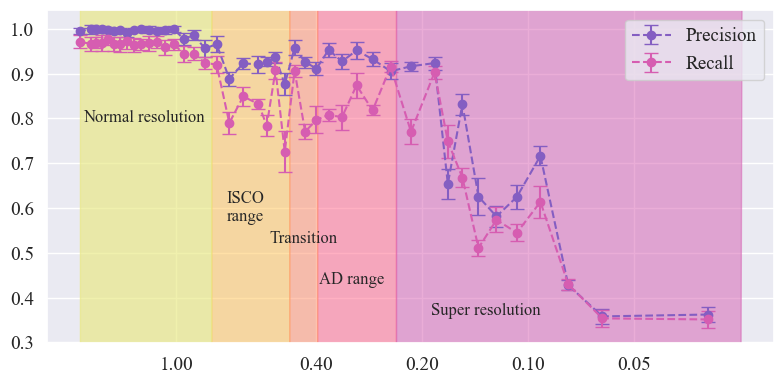

In [21]:
# x0 = 4.6e-5 * 3072 # upper bound
# x1 = 7.1e-5 * 3072 # lower bound
# x2 = 10.1e-5 * 3072 # ISCO
np.random.seed(2024)
upper = 7.7e-5 * 3072 # upper bound
lower = 1.29e-4 * 3072 # lower bound
ISCO_upper = 4*3.87e-5 * 3072 # ISCO upper bound
ISCO_lower = 4*6.45e-5 * 3072 # ISCO lower bound
x = df_cut_pr['angular_pixel_size_input_image'] * 3072
y = df_cut_pr['precision']
y2 = df_cut_pr['recall']
error = list(map(error_bar, y))
error2 = list(map(error_bar, y2))
fig, ax = plt.subplots(figsize=(8, 4))
# ax.axvline(x=x0,color='#008F7A')
# ax.axvline(x=x1,color='#008E9B')
# ax.axvline(x=x2,color='#0089BA')
# print(x)
# print(y)
# print(error)
ax.errorbar(x, y, error, fmt='o--', capsize=5, color='#845EC2', label='Precision')
ax.errorbar(x, y2, error2, fmt='o--', capsize=5, color='#D65DB1', label='Recall')
# ax.plot(x, smooth(y.values, 0.05), color='purple', linestyle=':', alpha=0.8)
# ax.grid()
points_num = 1000
el = Ellipse((2, -1), 0.5, 0.5)
xf = np.linspace(upper, lower, points_num)
y_upper = ax.get_ylim()[1]
y_lower = ax.get_ylim()[0]
yf1 = [y_upper+0.2]*points_num
yf0 = [y_lower-0.1]*points_num
# AD range
ax.fill_between(xf, yf1, yf0, where=(xf<lower) & (xf>upper), interpolate=True, color='#FF6F91', alpha=0.55)
# ISCO range
xf = np.linspace(ISCO_upper, ISCO_lower, points_num)
ax.fill_between(xf, yf1, yf0, where=(xf<ISCO_lower) & (xf>ISCO_upper), interpolate=True, color='#FFC75F', alpha=0.55)
# transition
xf = np.linspace(lower, ISCO_upper, points_num)
ax.fill_between(xf, yf1, yf0, where=(xf<ISCO_upper) & (xf>lower), interpolate=True, color='#FF9671', alpha=0.55)
# normal resolution
xf = np.linspace(ISCO_lower, x.max(), points_num)
ax.fill_between(xf, yf1, yf0, where=(xf<x.max()) & (xf>ISCO_lower), interpolate=True, color='#E9E881', alpha=0.65)
# super resolution
xf = np.linspace(x.min()*0.8, upper, points_num)
ax.fill_between(xf, yf1, yf0, where=(xf<upper) & (xf>x.min()*0.8), interpolate=True, color='#D65DB1', alpha=0.5)


ax.set_ylim([y_lower, y_upper])
ax.invert_xaxis()
# add a line pointing to x=x0 line
# ax.annotate(r'Upper Bound', xy=(upper, y_upper), xytext=(upper, y_upper+0.08),
#             arrowprops=dict(facecolor='#D65DB1', shrink=0.05), horizontalalignment='center', verticalalignment='bottom')
ax.annotate('Normal resolution', xy=(ISCO_lower, y_upper), xytext=((ISCO_lower + x.max()) / 2 - 0.1, 0.8),
            horizontalalignment='center', verticalalignment='center')
ax.annotate('ISCO\nrange', xy=(ISCO_upper, y_upper), xytext=((ISCO_upper + ISCO_lower) / 2, 0.6),
            horizontalalignment='center', verticalalignment='center')
ax.annotate('Transition', xy=(lower, y_upper), xytext=((lower + ISCO_upper) / 2, 0.53),
            horizontalalignment='center', verticalalignment='center')
ax.annotate('AD range', xy=((lower + upper) / 2, y_upper), xytext=((lower + upper) / 2, 0.44),
            horizontalalignment='center', verticalalignment='center')
ax.annotate('Super resolution', xy=(ISCO_lower, y_upper), xytext=((x.min() + upper) / 2 - 1.8e-3, 0.37),
            horizontalalignment='center', verticalalignment='center')
ax.legend()
ax.set_xscale('log')
# ax.set_xlabel('Angular size of the image (in arcsec)')
# ax.set_ylabel(metric_name)
ax.set_xticks([1, 0.4, 0.2, 0.1, 0.05])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
fig.tight_layout()
# fig.set_margin(x=0, y=0)
# plt.savefig(f'images/pr_vs_angular_size.png', dpi=200, bbox_inches='tight')
# plt.savefig(f'images/pr_vs_angular_size.pdf', bbox_inches='tight')
plt.show()